<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/etas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Stieljtes constants

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
DATA_PATH = "/content/gdrive/My Drive/Colab Notebooks/math/gammas"

import pickle
pickle_in = open(DATA_PATH+'/gammas_digits1000_n100000.pkl', 'rb')
txt_gammas = pickle.load(pickle_in)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Modules

In [ ]:
import mpmath as mp
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
import scipy.special as scp

mp.dps = 900; mp.pretty = True

%matplotlib inline

gammas = [mp.mpf(g) for g in txt_gammas]
N = len(gammas)
print("Type: {}, Length: {}, First element: {}".format(type(gammas),len(gammas),gammas[0]))

Type: <class 'list'>, Length: 100001, First element: 0.577215664901533


Calculate etas

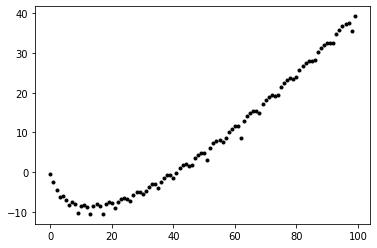

In [ ]:
#gammas_rand = [abs(g) for g in gammas]

dn = np.arange(0,100,1)
gn = np.array([mp.log(abs(gammas[n])) for n in dn])
#rgn = np.array([mp.log(abs(gammas_rand[n])) for n in dn])

#plt.figure(figsize=(15,10))
plt.plot(dn, gn, 'k.')
#plt.plot(dn, rgn, 'b.')


In [ ]:
mp.dps = 900
etas = []

def eval_eta_rec(n,etas,gammas):
  sum_terms = []
  for k in range(0,n):
    sum_terms.append(abs(etas[k])*(gammas[n-k-1])/mp.gamma(n-k))
  sum_terms.append((n+1)*gammas[n]/mp.gamma(n+1))
  sum_terms = sorted(sum_terms, key=abs)#,reverse=True)
  #print(sum_terms)
  tot = 0.
  for term in sum_terms:
    tot += term
  sign = (1,-1)[n%2==0]
  return sign*tot

for n in range(1000):
  etas.append(eval_eta_rec(n,etas,gammas))
  if(n%100 == 0):
    print("eta({}) = {}, {}".format(n,etas[n], gammas[n]))

eta(0) = -0.577215664901533, 0.577215664901533
eta(100) = -6.46775072494206e-49, -4.25340157170803e+17
eta(200) = -1.25495398319966e-96, -6.97464971947882e+55
eta(300) = -2.43501886038256e-144, -5.55672822025266e+102
eta(400) = -4.72472849984606e-192, -1.76164218667593e+152
eta(500) = -9.16750985401012e-240, -1.16550527223372e+204
eta(600) = -1.77879505512564e-287, 3.56274628681888e+257
eta(700) = -3.45144090219369e-335, -3.54945218457065e+312
eta(800) = -6.69691781917737e-383, 4.91354056171831e+369
eta(900) = -1.29941985239586e-430, -3.81784310426304e+427


In [ ]:
def eval_eta_approx(p,n,letas,lgammas):
  if n < p:
    return etas[n]
  tot = 0.
  fp = (p,p+1)[n%2==0]
  for k in range(fp):
    tot += lgammas[k]*abs(letas[n-k-1])/scp.gamma(k+1)
  tot = (tot,-tot)[n%2 == 0]
  return tot#*1.00087
    #  return (tot,-tot)[n%2 == 0]

etaps = []
for n in range(1000):
  etaps.append(eval_eta_approx(5,n,etaps,gammas))
  #print("eta({}) = {} vs {} --> {}%".format(n,etas[n],etaps[n],((etaps[n])/etas[n])))

[-1.11151877  0.99877406]


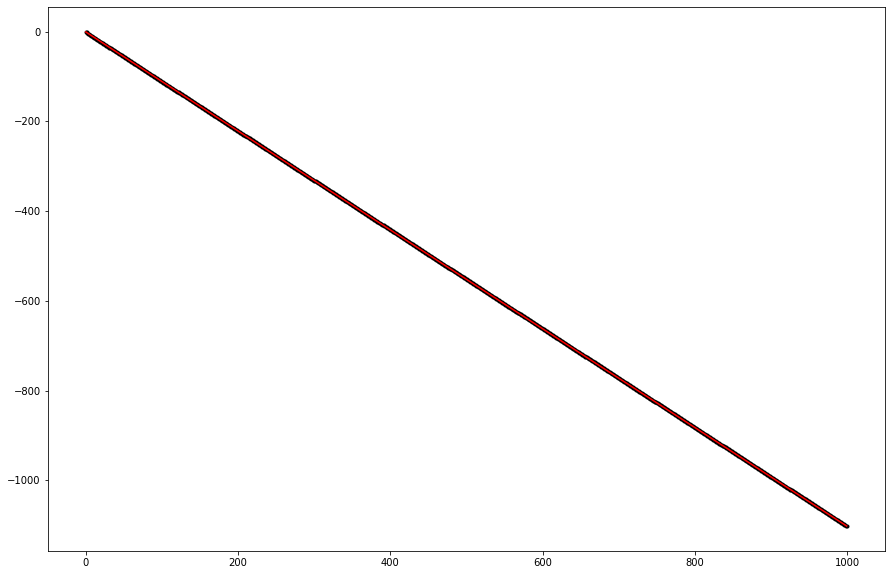

In [ ]:
def mypow(x, a,b):
  return a*x**b + np.log(0.577215664901533)

dn = np.arange(0,1000,1)
#gn = np.array([mp.log(abs(gammas[n]))-scp.gammaln(n+1)+2*n for n in dn])
en = np.array([mp.log(abs(etaps[n])) for n in dn])
popt, pcov = opt.curve_fit(mypow,  dn,  en,  p0=(2,1))
print(popt)

#fn = mypow(dn,-1.0994363)#*popt)

plt.figure(figsize=(15,10))
#plt.plot(dn, gn, 'k.')
plt.plot(dn, en, 'k.')
plt.plot(dn,mypow(dn,*popt),'r-')
#plt.plot(dn, en-fn, 'r.')

axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([-2300,-2200])
plt.show()

In [ ]:
mp.dps = 900
print(mp.mp)
def lambda_tilde(n):
  sum_terms = []
  for k in range(1,n+1):
    sum_terms.append(mp.binomial(n,k)*etas[k-1])
  sum_terms = sorted(sum_terms, key=abs,reverse=True)
  #print(sum_terms)
  tot = 0.
  for term in sum_terms:
    tot += term
  #  print(tot)
  return tot
#  tot1,tot2 = 0.,0.
#  for k in range(1,n+1,2):
#    tot1 += scp.binom(n,k)*etas[k-1]#*(1+1e-5*np.random.rand(1)[0])#/(1-0.026819467)
#  for k in range(2,n+1,2):
#    tot2 += scp.binom(n,k)*etas[k-1]#/(1-0.026819467)
  #print("{} & {}".format(tot1,tot2))
#  return tot1+tot2

def lambda_tilde_half(n,p):
  tot1,tot2 = 0.,0.
  #print("lambda {} {}".format(n,n+p))
  for k in range(1,n//2+p,2):
    tot1 += scp.binom(n,k)*etas[k-1]#*(1+1e-5*np.random.rand(1)[0])#/(1-0.026819467)
  for k in range(2,n//2+p,2):
    tot2 += scp.binom(n,k)*etas[k-1]#/(1-0.026819467)
  #print("{} & {}".format(tot1,tot2))
  return tot1+tot2

def lambda_tilde_mid(n,p):
  tot1,tot2 = 0.,0.
  #print("lambda {} {}".format(n//2-p,n//2+p))
  for k in range(n//2-p,n//2+p,2):
    tot1 += scp.binom(n,k)*etas[k-1]#*(1+1e-5*np.random.rand(1)[0])#/(1-0.026819467)
  for k in range(n//2-p+1,n//2+p,2):
    tot2 += scp.binom(n,k)*etas[k-1]#/(1-0.026819467)
  #print("{} & {}".format(tot1,tot2))
  return tot1+tot2

def lambda_tilde_dic(n):
  terms = {}
  for k in range(1,n+1):
    val = scp.gammaln(n+1)+mp.log(abs(etas[k-1]))-scp.gammaln(k+1)-scp.gammaln(n-k+1)
    terms[val] = k
  tot = 0.
  for term in sorted(terms):
    sign = (1,-1)[terms[term]%2==1]
    tot += sign*mp.exp(term)
  return tot


n = 75
print("lambdas({}) = {}".format(n,lambda_tilde(n)))
lambdas = [0]
#lambdas_half = [0]
#lambdas_mid = [0]
for n in range(0,15):
  lambdas.append(-lambda_tilde(n))
  #lambdas_half.append(-lambda_tilde_half(n,n//8))
  #lambdas_mid.append(-lambda_tilde_mid(n,n//4))
  #if(n%100 == 0):
  print("lambdas({}) = {}".format(n,lambdas[n]))

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]
lambdas(75) = -0.58818139259992
lambdas(0) = 0
lambdas(1) = -0.0
lambdas(2) = 0.577215664901533
lambdas(3) = 0.966885096962701
lambdas(4) = 1.2206969282167
lambdas(5) = 1.37558813187126
lambdas(6) = 1.45826850019717
lambdas(7) = 1.48829832721222
lambdas(8) = 1.48019084023884
lambdas(9) = 1.44485574411943
lambdas(10) = 1.3905964067913
lambdas(11) = 1.32380368369629
lambdas(12) = 1.24944277582208
lambdas(13) = 1.17139824693906
lambdas(14) = 1.09272131711462


In [ ]:
def mypow2(x, a, b, c):
  return a*(x**b) + c

dn = np.arange(1,125,1)
#gn = np.array([mp.log(abs(gammas[n]))-scp.gammaln(n+1)+2*n for n in dn])
ln = np.array([lambdas[n] for n in dn])
#lhn = np.array([lambdas_half[n] for n in dn])
#lmn = np.array([lambdas_mid[n] for n in dn])
#popt, pcov = opt.curve_fit(mypow2,  dn,  ln,  p0=(2,1,10))
#print(popt)

#fn = mypow(dn,-1.0994363)#*popt)

plt.figure(figsize=(15,10))
plt.plot(dn, ln, 'k.')
#plt.plot(dn, lhn, 'r.')
#plt.plot(dn, lmn, 'g.')
#plt.plot(dn, en, 'k.')
#plt.plot(dn,mypow2(dn,*popt),'r-')
#plt.plot(dn, en-fn, 'r.')

axes = plt.gca()
#axes.set_xlim([2020,2060])
#axes.set_ylim([-2300,-2200])
plt.show()

IndexError: ignored

In [ ]:
print(np.random.rand(1)[0])
print(np.random.rand(1)[0])